### Calculando a Taxa de Retorno de um Portfolio

In [1]:
# Importando as Bibliotecas Necessárias:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
# Criando o Dataframe com os dados dos Ativos:
tickers = ['PG', 'MSFT', 'F', 'GE']
portfolio = pd.DataFrame()
for t in tickers:
    portfolio[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']
    
portfolio

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.875520,2.359439,4.264751,32.808640
1995-01-04,7.812392,2.376589,4.379502,32.808640
1995-01-05,7.701915,2.337389,4.341250,32.889042
1995-01-06,7.717698,2.376589,4.341250,32.728233
1995-01-09,7.686130,2.361888,4.417748,32.406563
...,...,...,...,...
2022-09-06,135.630005,253.250000,15.030000,72.160004
2022-09-07,137.679993,258.089996,15.430000,73.580002
2022-09-08,137.860001,258.519989,15.470000,73.769997


#### Gerando Gráficos comparativos dos Ativos:

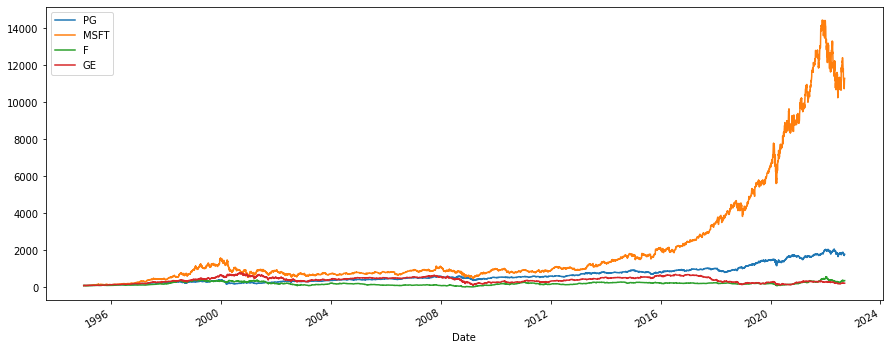

In [3]:
# Plotando um gráfico de Registros Normalizados na base 100:

inicial = portfolio.iloc[0] # extrai os dados da primeira linha do dataframe

(portfolio / inicial * 100).plot(figsize=(15,6)) # normaliza os dados na base 100 e gera o gráfico

plt.show() # exibe o gráfico

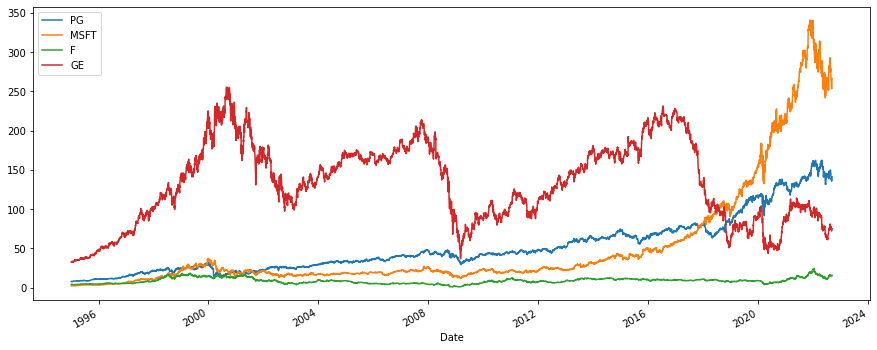

In [4]:
# Gráfico sem normalizar os registros:
portfolio.plot(figsize=(15,6))
plt.show()

#### Calcular o Retorno Simples de cada Ação:

In [5]:
# Gera a tabela com os retornos diários de cada ação;
returns = (portfolio / portfolio.shift(1)) - 1
returns

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026907,0.000000
1995-01-05,-0.014141,-0.016494,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004889
1995-01-09,-0.004090,-0.006186,0.017621,-0.009829
...,...,...,...,...
2022-09-06,-0.011155,-0.010974,-0.008575,-0.003728
2022-09-07,0.015115,0.019112,0.026613,0.019678
2022-09-08,0.001307,0.001666,0.002592,0.002582


In [6]:
# Cria uma array numpy com os pesos das ações no Portfolio:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [7]:
# Calcula os retornos ponderados dos ativos:
np.dot(returns, weights)

array([        nan,  0.00654001, -0.00922984, ...,  0.002037  ,
        0.00965946,  0.00980563])

#### Calculando o Retorno da Carteira:

In [8]:
# Calculo dos Retornos Medios Anuais das Ações:
annual_returns = returns.mean() * 250
annual_returns

PG      0.128593
MSFT    0.218625
F       0.127248
GE      0.081312
dtype: float64

In [9]:
# Calculo do Retorno da Carteira:
portfolio_return = np.dot(annual_returns, weights)
portfolio_return

0.13894441983129752

In [10]:
# Impressão do Resultado:
print(f'{portfolio_return*100:.2f}%')

13.89%


In [12]:
# Atribuindo novos pesos:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [13]:
# Novo Retorno da Carteira
portfolio_return_2 = np.dot(annual_returns, weights_2)
print(f'{portfolio_return_2*100:.2f}%')

16.20%


In [14]:
print(f'Carteira 1: {portfolio_return*100:.2f}%\nCarteira 2: {portfolio_return_2*100:.2f}%')

Carteira 1: 13.89%
Carteira 2: 16.20%
